In [1]:
## SIMULATE TCS using POISSON PROCESS WITH MONTHLY RATE ???
## SANITY CHECK FOR CMIP


In [2]:
from utils.cyclone_utils import get_datetime
import pandas as pd


## CYCLONE MASTER DF
cyclone_df = pd.read_csv('../cyclone_data/jtwc/cleaned/full_cleaned.csv')
cyclone_df['month'] = cyclone_df['timestamp'].apply(lambda x: get_datetime(x).month) 
cyclone_df


timestamp   Storm ID BASIN  Season  SEASON TC NUMBER  \
0     1982-03-14 06:00:00   1982-N-1    WP  1982.0               1.0   
1     1981-10-21 06:00:00   1982-S-2    SI  1982.0               2.0   
2     1982-03-18 06:00:00   1982-N-2    WP  1982.0               2.0   
3     1981-11-03 18:00:00   1982-S-3    SI  1982.0               3.0   
4     1982-03-28 06:00:00   1982-N-3    WP  1982.0               3.0   
...                   ...        ...   ...     ...               ...   
1854  2022-10-14 06:00:00  2022-N-24    WP  2022.0              24.0   
1855  2022-10-26 00:00:00  2022-N-26    WP  2022.0              26.0   
1856  2022-10-28 12:00:00  2022-N-27    WP  2022.0              27.0   
1857  2022-11-11 18:00:00  2022-N-28    WP  2022.0              28.0   
1858  2022-12-08 00:00:00  2022-N-29    WP  2022.0              29.0   

      Latitude (degrees)  Longitude (degrees)  VMAX (kt)  Peak VMAX (kt)  \
0                    7.1                153.0       15.0            60.0   
1                   -8.0                 84.6       40.0            85.0   
2                    3.8                160.7       25.0           105.0   
3                   -8.6                 92.9       55.0            80.0   
4                    3.5                156.6       20.0            75.0   
...                  ...                  ...        ...             ...   
1854                26.4                154.4       25.0            40.0   
1855                12.2                133.8       20.0            75.0   
1856                 8.0                140.4       25.0            40.0   
1857                20.2                166.3       20.0            40.0   
1858                 6.4                133.1       15.0            50.0   

          ACE  Maximum 24h Intensification  Month  Tropical SST  \
0     0.73250                         15.0      3     27.237669   
1     1.18725                         25.0     10     26.766030   
2     2.02800                         25.0      3     27.237669   
3     1.08875                         15.0     11     26.829243   
4     0.70650                         15.0      3     27.237669   
...       ...                          ...    ...           ...   
1854  0.19675                         15.0     10     26.962795   
1855  0.67825                         25.0     10     26.962795   
1856  0.10875                         15.0     10     26.962795   
1857  0.10600                         10.0     11     27.142609   
1858  0.17550                         20.0     12     27.141811   

      Tropical Anomaly  Local SST  Relative SST  Saffir-Simpson Category  \
0            -0.270336  28.082220      0.844551                        1   
1            -0.146004  28.012896      1.246866                        2   
2            -0.270336  29.003502      1.765833                        3   
3            -0.228115  27.334639      0.505396                        1   
4            -0.270336  28.872086      1.634417                        1   
...                ...        ...           ...                      ...   
1854          0.050762  28.137896      1.175100                        1   
1855          0.050762  29.645842      2.683046                        1   
1856          0.050762  29.821840      2.859045                        1   
1857          0.085251  28.148760      1.006151                        1   
1858          0.112261  29.715696      2.573885                        1   

      month  
0         3  
1        10  
2         3  
3        11  
4         3  
...     ...  
1854     10  
1855     10  
1856     10  
1857     11  
1858     12  

[1859 rows x 18 columns]

In [3]:
## Split into basins and calculate rates for each calendar month
dfs = {}
for basin_name in cyclone_df['BASIN'].unique():
    dfs[basin_name] = cyclone_df.loc[cyclone_df.loc[:, 'BASIN'] == basin_name]

## rate = mean occurrence per month....
rates = {}
basin_boundaries = {}

for basin_name in dfs.keys():
    basin_df = dfs[basin_name]
    BASIN_NUM_SEASONS = basin_df['Season'].max() - basin_df['Season'].min()
    # basin_boundaries[basin_name] = {
    #     'lat': {
    #         'min': basin_df['Latitude (degrees)'].min(),
    #         'max': basin_df['Latitude (degrees)'].max()
    #     },
    #     'lon': {
    #         'min': basin_df['Longitude (degrees)'].min(),
    #         'max': basin_df['Longitude (degrees)'].max()
    #     }
    # }

    for month in range(1,13):
        ## probably faster with groupby
        basin_month_num_cyclones = basin_df.loc[basin_df.loc[:, 'month'] == month].shape[0]
        avg_month_rate = basin_month_num_cyclones/BASIN_NUM_SEASONS
        if basin_name not in rates.keys():
            rates[basin_name] = {}
        rates[basin_name][month] = avg_month_rate
        

## Sample some cyclones for each basin

In [4]:
# from datetime import datetime, timedelta
# import numpy as np


# def get_start_of_next_month(dt):
#     month = dt.month
#     year = dt.year
#     if month == 12:
#         return datetime.strptime(f'{year + 1}-01-01', "%Y-%m-%d")
    
#     return datetime.strptime(f'{year}-{month + 1}-01', "%Y-%m-%d")

# new_cyclones = None

# for basin_name in rates.keys():
#     start_time = None;
#     end_time = None
#     basin_df = dfs[basin_name]

#     if basin_name == 'WP':
#         ## should we only filter by cyclone seasons
#         start_time = datetime.strptime("1982-01-01", "%Y-%m-%d")
#         end_time = datetime.strptime("2015-01-01", "%Y-%m-%d")
#     else:
#         start_time = datetime.strptime("1982-07-01", "%Y-%m-%d")
#         end_time = datetime.strptime("2015-01-01", "%Y-%m-%d")

#     current_time = start_time
   
#     while current_time < end_time:
#         current_month = current_time.month
#         current_year = current_time.year
#         start_of_next_month = get_start_of_next_month(current_time)
#         print('current time: ' + current_time.strftime('%Y-%m-%d'))
#         current_rate = rates[basin_name][current_month]
#         if current_rate == 0:
#             current_time = get_start_of_next_month(current_time)
#             print('no cyclones, skipping month')
#         else:
#             months_till_cyclone = np.random.exponential(1/current_rate)
#             print(f'months till next cyclone: {months_till_cyclone}')
#             delta = timedelta(days = months_till_cyclone * (365.25/12))
#             time_of_start = current_time + delta
#             if time_of_start > start_of_next_month:
#                 print('in next month, rate changes!!!')
#                 current_time = get_start_of_next_month(current_time)
#             else:
#                 print('still in current month')
#                 time_of_start = current_time + delta
#                 print('genesis date: ' +  time_of_start.strftime('%Y-%m-%d'))

#                 ## SAMPLE ITS LOCATION AND ADD TO DATAFRAME
#                 ## ATM JUST UNIFORMLY...

#                 ## add some gaussian noise....
#                 # lat_noise = np.random.normal(0,1)
#                 # lon_noise = np.random.normal(0,2)

#                 coord_pairs = np.array(list(zip(basin_df['Latitude (degrees)'], basin_df['Longitude (degrees)'])))
#                 index = np.random.choice(coord_pairs.shape[0], 1)
#                 coord = coord_pairs[index][0]

#                 lat = coord[0]
#                 lon = coord[1]

#                 cyclone_obj = {
#                     'timestamp': [datetime.strftime(time_of_start, '%Y-%m-%d')],
#                     'lat': [lat],
#                     'lon': [lon],
#                     'BASIN': [basin_name]
#                 }

#                 print(cyclone_obj)

#                 new_cyclone = pd.DataFrame(cyclone_obj)
#                 if new_cyclones is None:
#                     new_cyclones = new_cyclone
#                 else:
#                     new_cyclones = pd.concat([new_cyclones, new_cyclone])

#                 # current_time += delta
#                 current_time = time_of_start
        

# new_cyclones
    


current time: 1982-01-01
months till next cyclone: 0.6606523071566974
still in current month
genesis date: 1982-01-21
{'timestamp': ['1982-01-21'], 'lat': [21.4], 'lon': [146.2], 'BASIN': ['WP']}
current time: 1982-01-21
months till next cyclone: 4.635437765833889
in next month, rate changes!!!
current time: 1982-02-01
months till next cyclone: 2.0708385119441997
in next month, rate changes!!!
current time: 1982-03-01
months till next cyclone: 0.6890576255006593
still in current month
genesis date: 1982-03-21
{'timestamp': ['1982-03-21'], 'lat': [5.5], 'lon': [138.7], 'BASIN': ['WP']}
current time: 1982-03-21
months till next cyclone: 13.149708822126886
in next month, rate changes!!!
current time: 1982-04-01
months till next cyclone: 0.6818618349407412
still in current month
genesis date: 1982-04-21
{'timestamp': ['1982-04-21'], 'lat': [12.3], 'lon': [151.6], 'BASIN': ['WP']}
current time: 1982-04-21
months till next cyclone: 1.6716092172069617
in next month, rate changes!!!
current ti

timestamp   lat    lon BASIN
0   1982-01-21  21.4  146.2    WP
0   1982-03-21   5.5  138.7    WP
0   1982-04-21  12.3  151.6    WP
0   1982-05-07  15.7  128.9    WP
0   1982-05-28   9.6  162.2    WP
..         ...   ...    ...   ...
0   2014-02-04 -16.2  158.0    SP
0   2014-03-16 -13.2  168.5    SP
0   2014-12-01  -9.6  155.0    SP
0   2014-12-05  -8.6  205.7    SP
0   2014-12-19 -15.4  162.8    SP

[1506 rows x 4 columns]

In [12]:
## Check month distribution
import matplotlib.pyplot as plt
import seaborn as sns

new_cyclones['month'] = new_cyclones['timestamp'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d').month)
new_cyclones = new_cyclones.sort_values(by=['month'])
new_cyclones['Month Name'] = new_cyclones['timestamp'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d').strftime('%b'))

fig, ax = plt.subplots(figsize=(8, 6))
# NORTHERN HEMISPHERE
sns.histplot(new_cyclones.loc[new_cyclones.loc[:, 'BASIN'] == 'WP'], x='Month Name',binwidth=3)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(new_cyclones.loc[new_cyclones.loc[:, 'BASIN'] != 'WP'], x='Month Name',binwidth=3)
plt.tight_layout()
plt.show()

NameError: name 'new_cyclones' is not defined

In [9]:

# %matplotlib inline
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

## only show origin sites for now
min_long = new_cyclones['lon'].min()
min_lat = new_cyclones['lat'].min()

max_long = new_cyclones['lon'].max()
max_lat = new_cyclones['lat'].max()

centre_long = (max_long-min_long)/2

print('latitude: ' + str(min_lat) + ' to ' + str(max_lat))
print('longitude: ' + str(min_long) + ' to ' + str(max_long))

height = 5
fig = plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
ax.set_extent([min_long - 10, max_long + 10 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

scatter = plt.scatter(x=new_cyclones['lon'], y=new_cyclones['lat'], transform=ccrs.PlateCarree(), s=35)

fig.tight_layout()
plt.show()

# fig.savefig('./media/Cyclone/cyclone_map/all_cyclones.png')

NameError: name 'new_cyclones' is not defined

In [7]:
from utils.SST_utils import get_cmip_historical, get_tropical_avg, get_local_smooth_at_time, sel_mm_yyyyy, get_local_mean

cmip_historical = get_cmip_historical()




In [8]:
cmip_tropical_avg = get_tropical_avg(cmip_historical)
cmip_tropical_avg

<xarray.DataArray 'tos_mean_mean' (time: 1980)>
array([26.74987 , 26.870823, 27.14454 , ..., 27.428991, 27.602339,
       27.604416], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00

In [9]:
# def filter_nan_from_values(list_obj):
#     if len(list_obj) == 0:
#         return np.nan
    
#     return list_obj[0]


# def curried_local_smooth(lat, lon, time):
#     return get_local_smooth_at_time(cmip_historical, lat,lon, time) 

# def curried_local_mean_for_month(lat, lon, time):
#     return get_local_mean(cmip_historical, lat,lon, time) 

# # def curried_local_smooth(lat, lon, time):
# #     return get_local_smooth_at_time(historical_ssts['sst'], lat,lon, time) 

# local_smooth_vectorized = np.vectorize(curried_local_smooth)
# local_mean_for_month_vectorized = np.vectorize(curried_local_mean_for_month)

# new_cyclones['timestamp'] = pd.to_datetime(new_cyclones['timestamp'])
# new_cyclones['timestamp'] = new_cyclones['timestamp'].apply(lambda x: str(x)) 

# new_cyclones['Tropical SST'] = new_cyclones.apply(
#     lambda row: filter_nan_from_values(cmip_tropical_avg.sel(time=sel_mm_yyyyy(cmip_tropical_avg, get_datetime(row['timestamp']).month, get_datetime(row['timestamp']).year)).values), axis=1)
# new_cyclones['Local SST'] = local_smooth_vectorized(new_cyclones['lat'], new_cyclones['lon'], new_cyclones['timestamp'])
# new_cyclones['Relative SST'] = new_cyclones['Local SST'] - new_cyclones['Tropical SST']
# new_cyclones = new_cyclones.loc[(new_cyclones.loc[:,'Relative SST'] >= 0)]
# ## actually need threshold??

# new_cyclones = new_cyclones.sort_values(by=['timestamp']).dropna(subset=['Tropical SST', 'Local SST'], how='any')

# new_cyclones.to_csv('../cyclone_data/resampled/historical_generated_cyclones_cmip.csv', index=False)
# new_cyclones
# ## ONLY HAVE RECORD UP TO 2014

timestamp   lat    lon BASIN  month Month Name  Tropical SST  \
0   1982-03-21 00:00:00   5.5  138.7    WP      3        Mar     27.564137   
0   1982-05-07 00:00:00  15.7  128.9    WP      5        May     27.752050   
0   1982-05-28 00:00:00   9.6  162.2    WP      5        May     27.752050   
0   1982-06-25 00:00:00   6.2  155.5    WP      6        Jun     27.378002   
0   1982-07-03 00:00:00  10.5  127.5    WP      7        Jul     26.943525   
..                  ...   ...    ...   ...    ...        ...           ...   
0   2014-12-05 00:00:00  -8.6  205.7    SP     12        Dec     27.604416   
0   2014-12-16 00:00:00 -11.8   83.8    SI     12        Dec     27.604416   
0   2014-12-19 00:00:00 -15.4  162.8    SP     12        Dec     27.604416   
0   2014-12-20 00:00:00   5.9  141.0    WP     12        Dec     27.604416   
0   2014-12-21 00:00:00  -4.1   65.3    SI     12        Dec     27.604416   

    Local SST  Relative SST  
0   28.659937      1.095800  
0   28.351694      0.599644  
0   28.082172      0.330122  
0   29.375015      1.997013  
0   29.500971      2.557446  
..        ...           ...  
0   29.462982      1.858566  
0   27.745266      0.140850  
0   28.557501      0.953085  
0   29.702286      2.097870  
0   29.195929      1.591513  

[1387 rows x 9 columns]

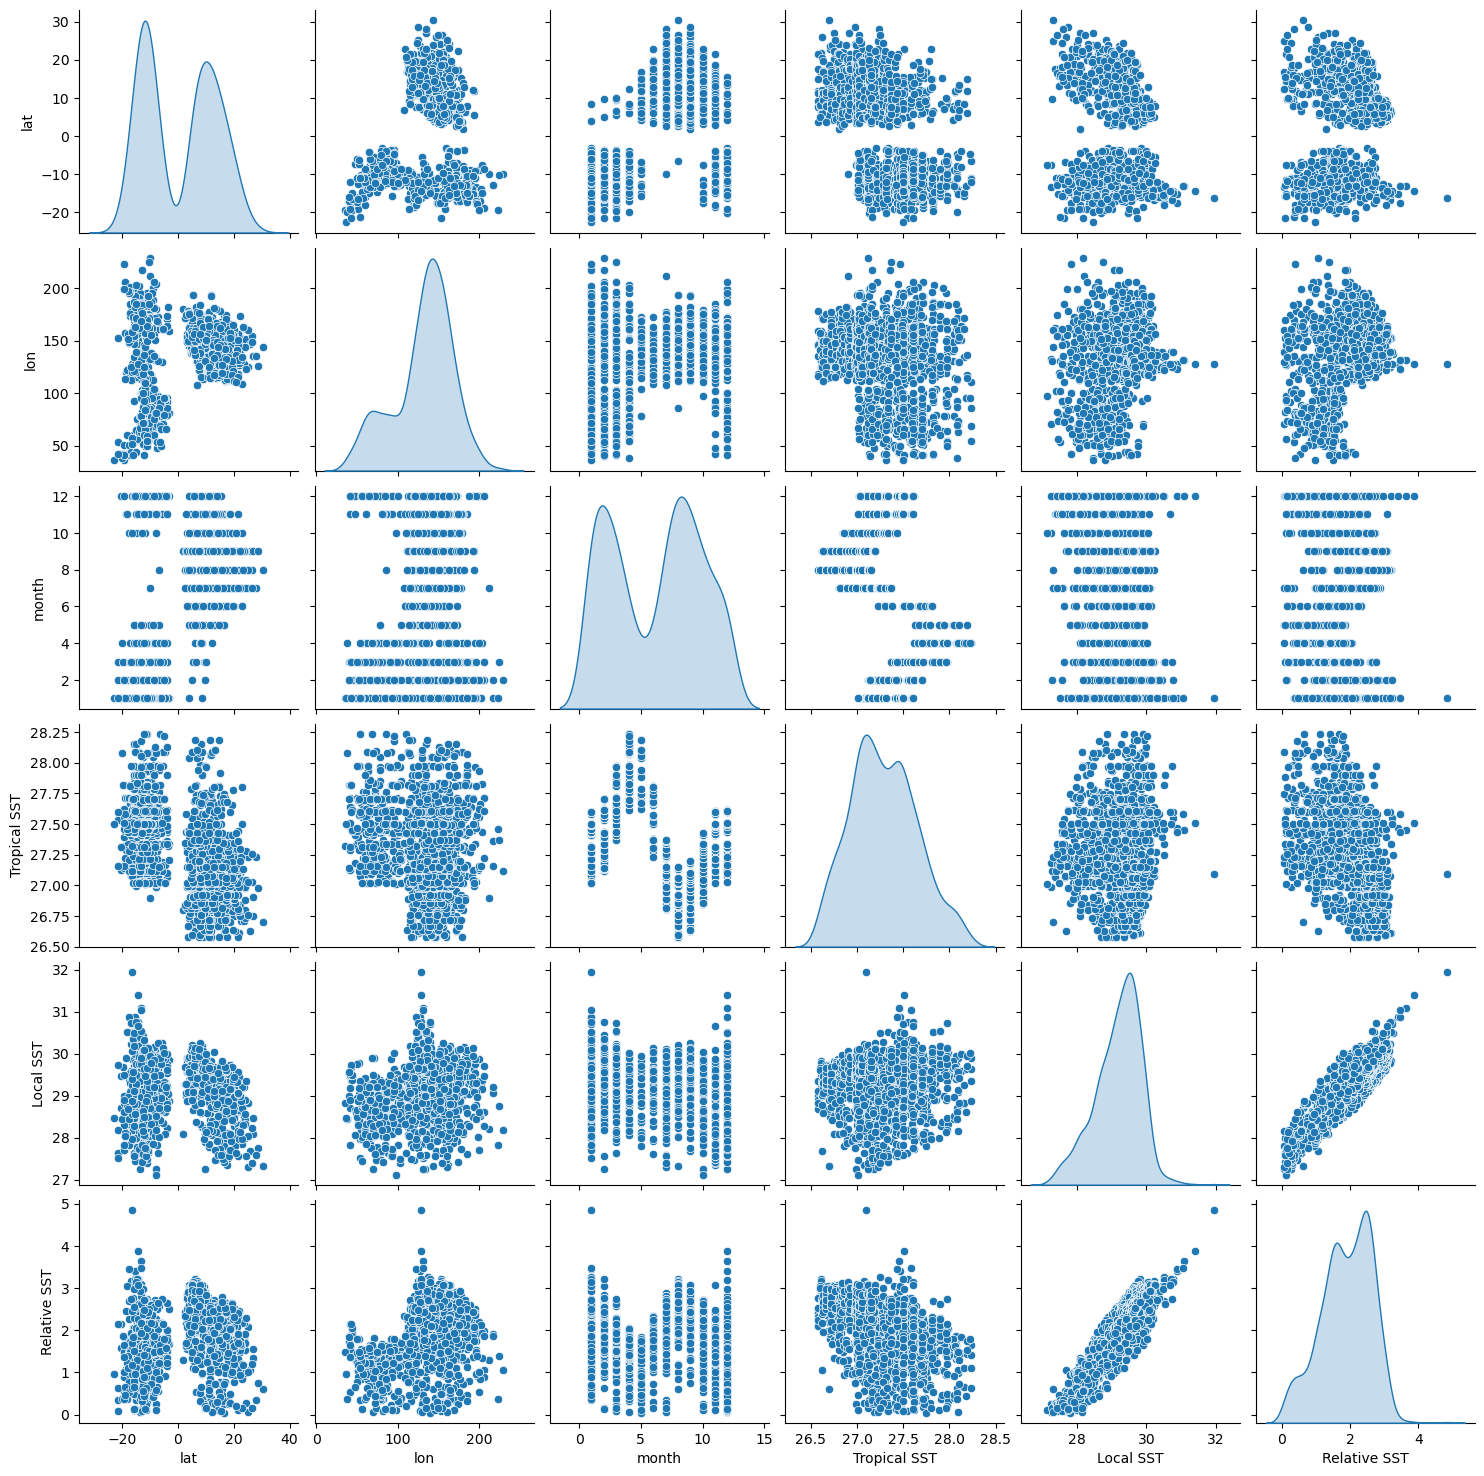

In [10]:
sns.pairplot(new_cyclones, diag_kind='kde')

WP
SI
SP


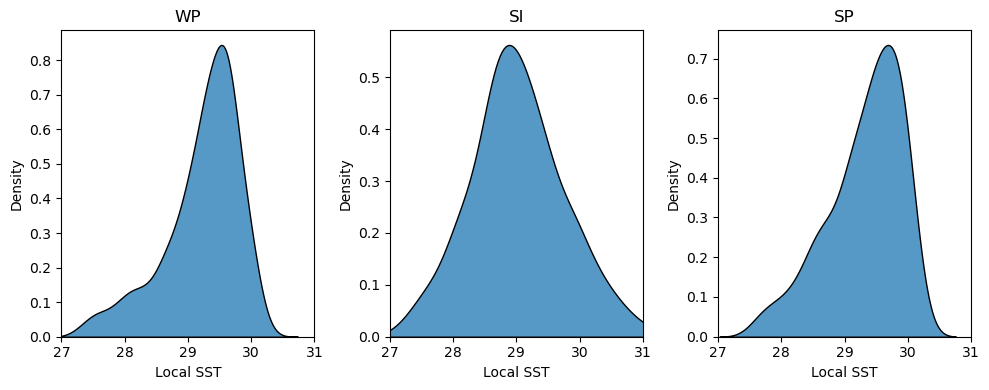

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
basin_names = new_cyclones['BASIN'].unique()

col = 0
for basin_name in basin_names:
    print(basin_name)
    df = new_cyclones.loc[new_cyclones.loc[:, 'BASIN'] == basin_name]
    sns.kdeplot(data=df, x='Local SST', ax=axs[col], multiple='stack').set(title=basin_name)
    axs[col].set_xbound(27,31)
    col += 1

plt.tight_layout()

# fig.savefig('./media/cyclone_sst/new_basins/kde/local_kde.png')
plt.show()

WP
SI
SP


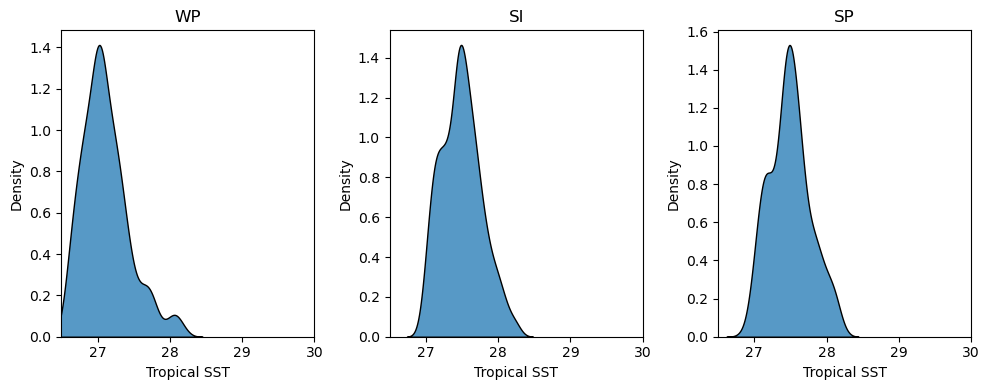

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
basin_names = new_cyclones['BASIN'].unique()

col = 0
for basin_name in basin_names:
    print(basin_name)
    df = new_cyclones.loc[new_cyclones.loc[:, 'BASIN'] == basin_name]
    sns.kdeplot(data=df, x='Tropical SST', ax=axs[col], multiple='stack').set(title=basin_name)
    axs[col].set_xbound(26.5,30)
    col += 1

plt.tight_layout()

# fig.savefig('./media/cyclone_sst/new_basins/kde/local_kde.png')
plt.show()

In [5]:
wind_predictions_df = pd.read_csv('../cyclone_data/resampled/resampled_tcs_with_wind.csv')
wind_predictions_df['relative_sst'] = wind_predictions_df['local_sst'] - wind_predictions_df['tropical_sst']
wind_predictions_df

timestamp  latitude_degrees  longitude_degrees basin  month  \
0     1982-06-07 00:00:00              16.9              116.9    WP      6   
1     1982-07-03 00:00:00              25.9              148.9    WP      7   
2     1982-07-08 00:00:00               9.2              159.2    WP      7   
3     1982-07-17 00:00:00              10.8              120.8    WP      7   
4     1982-07-23 00:00:00              17.5              117.5    WP      7   
...                   ...               ...                ...   ...    ...   
1424  2014-10-05 00:00:00              14.7              119.6    WP     10   
1425  2014-10-31 00:00:00              15.2              130.5    WP     10   
1426  2014-11-01 00:00:00               9.2              140.3    WP     11   
1427  2014-12-04 00:00:00              11.3              167.5    WP     12   
1428  2014-12-21 00:00:00               3.8              160.7    WP     12   

      tropical_sst  local_sst  relative_sst  tropical_sst_scaled  \
0        27.378002  29.218317      1.840315             0.238514   
1        26.943525  27.365335      0.421810            -0.950586   
2        26.943525  29.270359      2.326834            -0.950586   
3        26.943525  29.465292      2.521767            -0.950586   
4        26.943525  29.322481      2.378956            -0.950586   
...            ...        ...           ...                  ...   
1424     27.428991  29.421350      1.992359             0.378063   
1425     27.428991  29.546170      2.117179             0.378063   
1426     27.602339  29.660233      2.057894             0.852492   
1427     27.604416  28.163870      0.559454             0.858176   
1428     27.604416  29.536890      1.932474             0.858176   

      local_sst_scaled  basin_numerical  resampled   peak_wind  quantile  
0             0.078537                2       True   44.746943      0.15  
1            -2.769759                2       True   45.330277      0.05  
2             0.158533                2       True   46.471640      0.15  
3             0.458173                2       True   51.254225      0.35  
4             0.238652                2       True  105.461177      0.65  
...                ...              ...        ...         ...       ...  
1424          0.390628                2       True   80.099614      0.45  
1425          0.582494                2       True  138.801081      0.95  
1426          0.757825                2       True   41.987046      0.05  
1427         -1.542297                2       True   99.342106      0.65  
1428          0.568229                2       True   39.873035      0.05  

[1429 rows x 14 columns]

latitude: -22.6 to 28.6
longitude: 35.8 to 223.2


/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


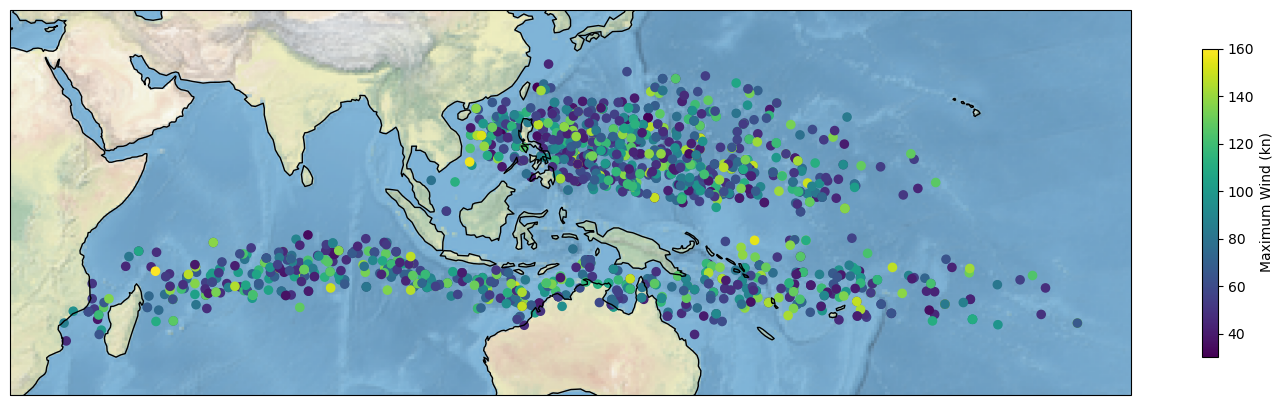

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [10]:
## only show origin sites for now
min_long = wind_predictions_df['longitude_degrees'].min()
min_lat = wind_predictions_df['latitude_degrees'].min()

max_long = wind_predictions_df['longitude_degrees'].max()
max_lat = wind_predictions_df['latitude_degrees'].max()
centre_long = (max_long-min_long)/2

print('latitude: ' + str(min_lat) + ' to ' + str(max_lat))
print('longitude: ' + str(min_long) + ' to ' + str(max_long))

height = 5
fig = plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
ax.set_extent([min_long - 10, max_long + 10 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

scatter = plt.scatter(x=wind_predictions_df['longitude_degrees'], y=wind_predictions_df['latitude_degrees'], cmap='viridis',c=wind_predictions_df['peak_wind'], transform=ccrs.PlateCarree(), s=35)
cbar = fig.colorbar(scatter,shrink=0.8)

cbar.set_label('Maximum Wind (kn)')
#spatial distribution and followup work

plt.show()
fig.tight_layout()
fig.savefig('./media/Cyclone/predictions/predict_map.png')

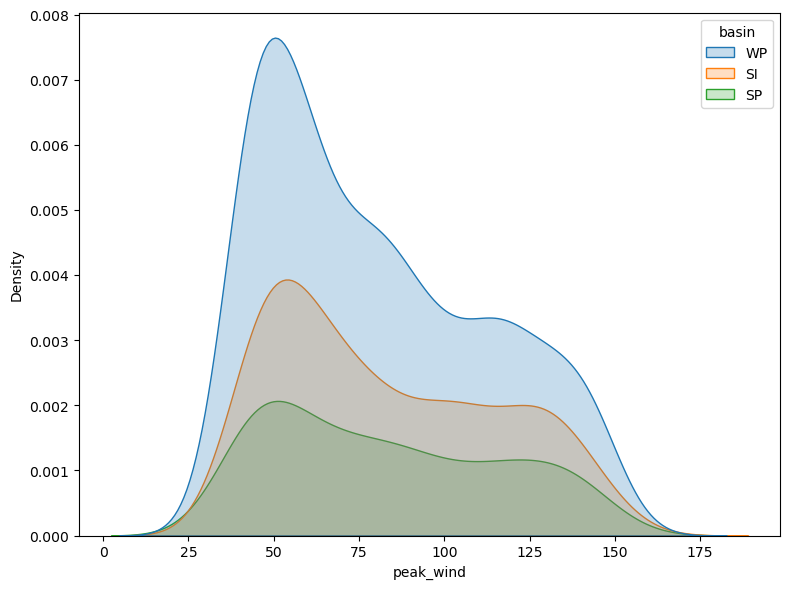

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
## ACTUALLY QUITE TRUE TO LIFE....
sns.kdeplot(data=wind_predictions_df, x='peak_wind', hue='basin', common_norm=True, fill=True,  multiple='layer', ax=ax)
plt.tight_layout()
plt.show()
fig.savefig(f'./media/Cyclone/predictions/wind_kde.png')

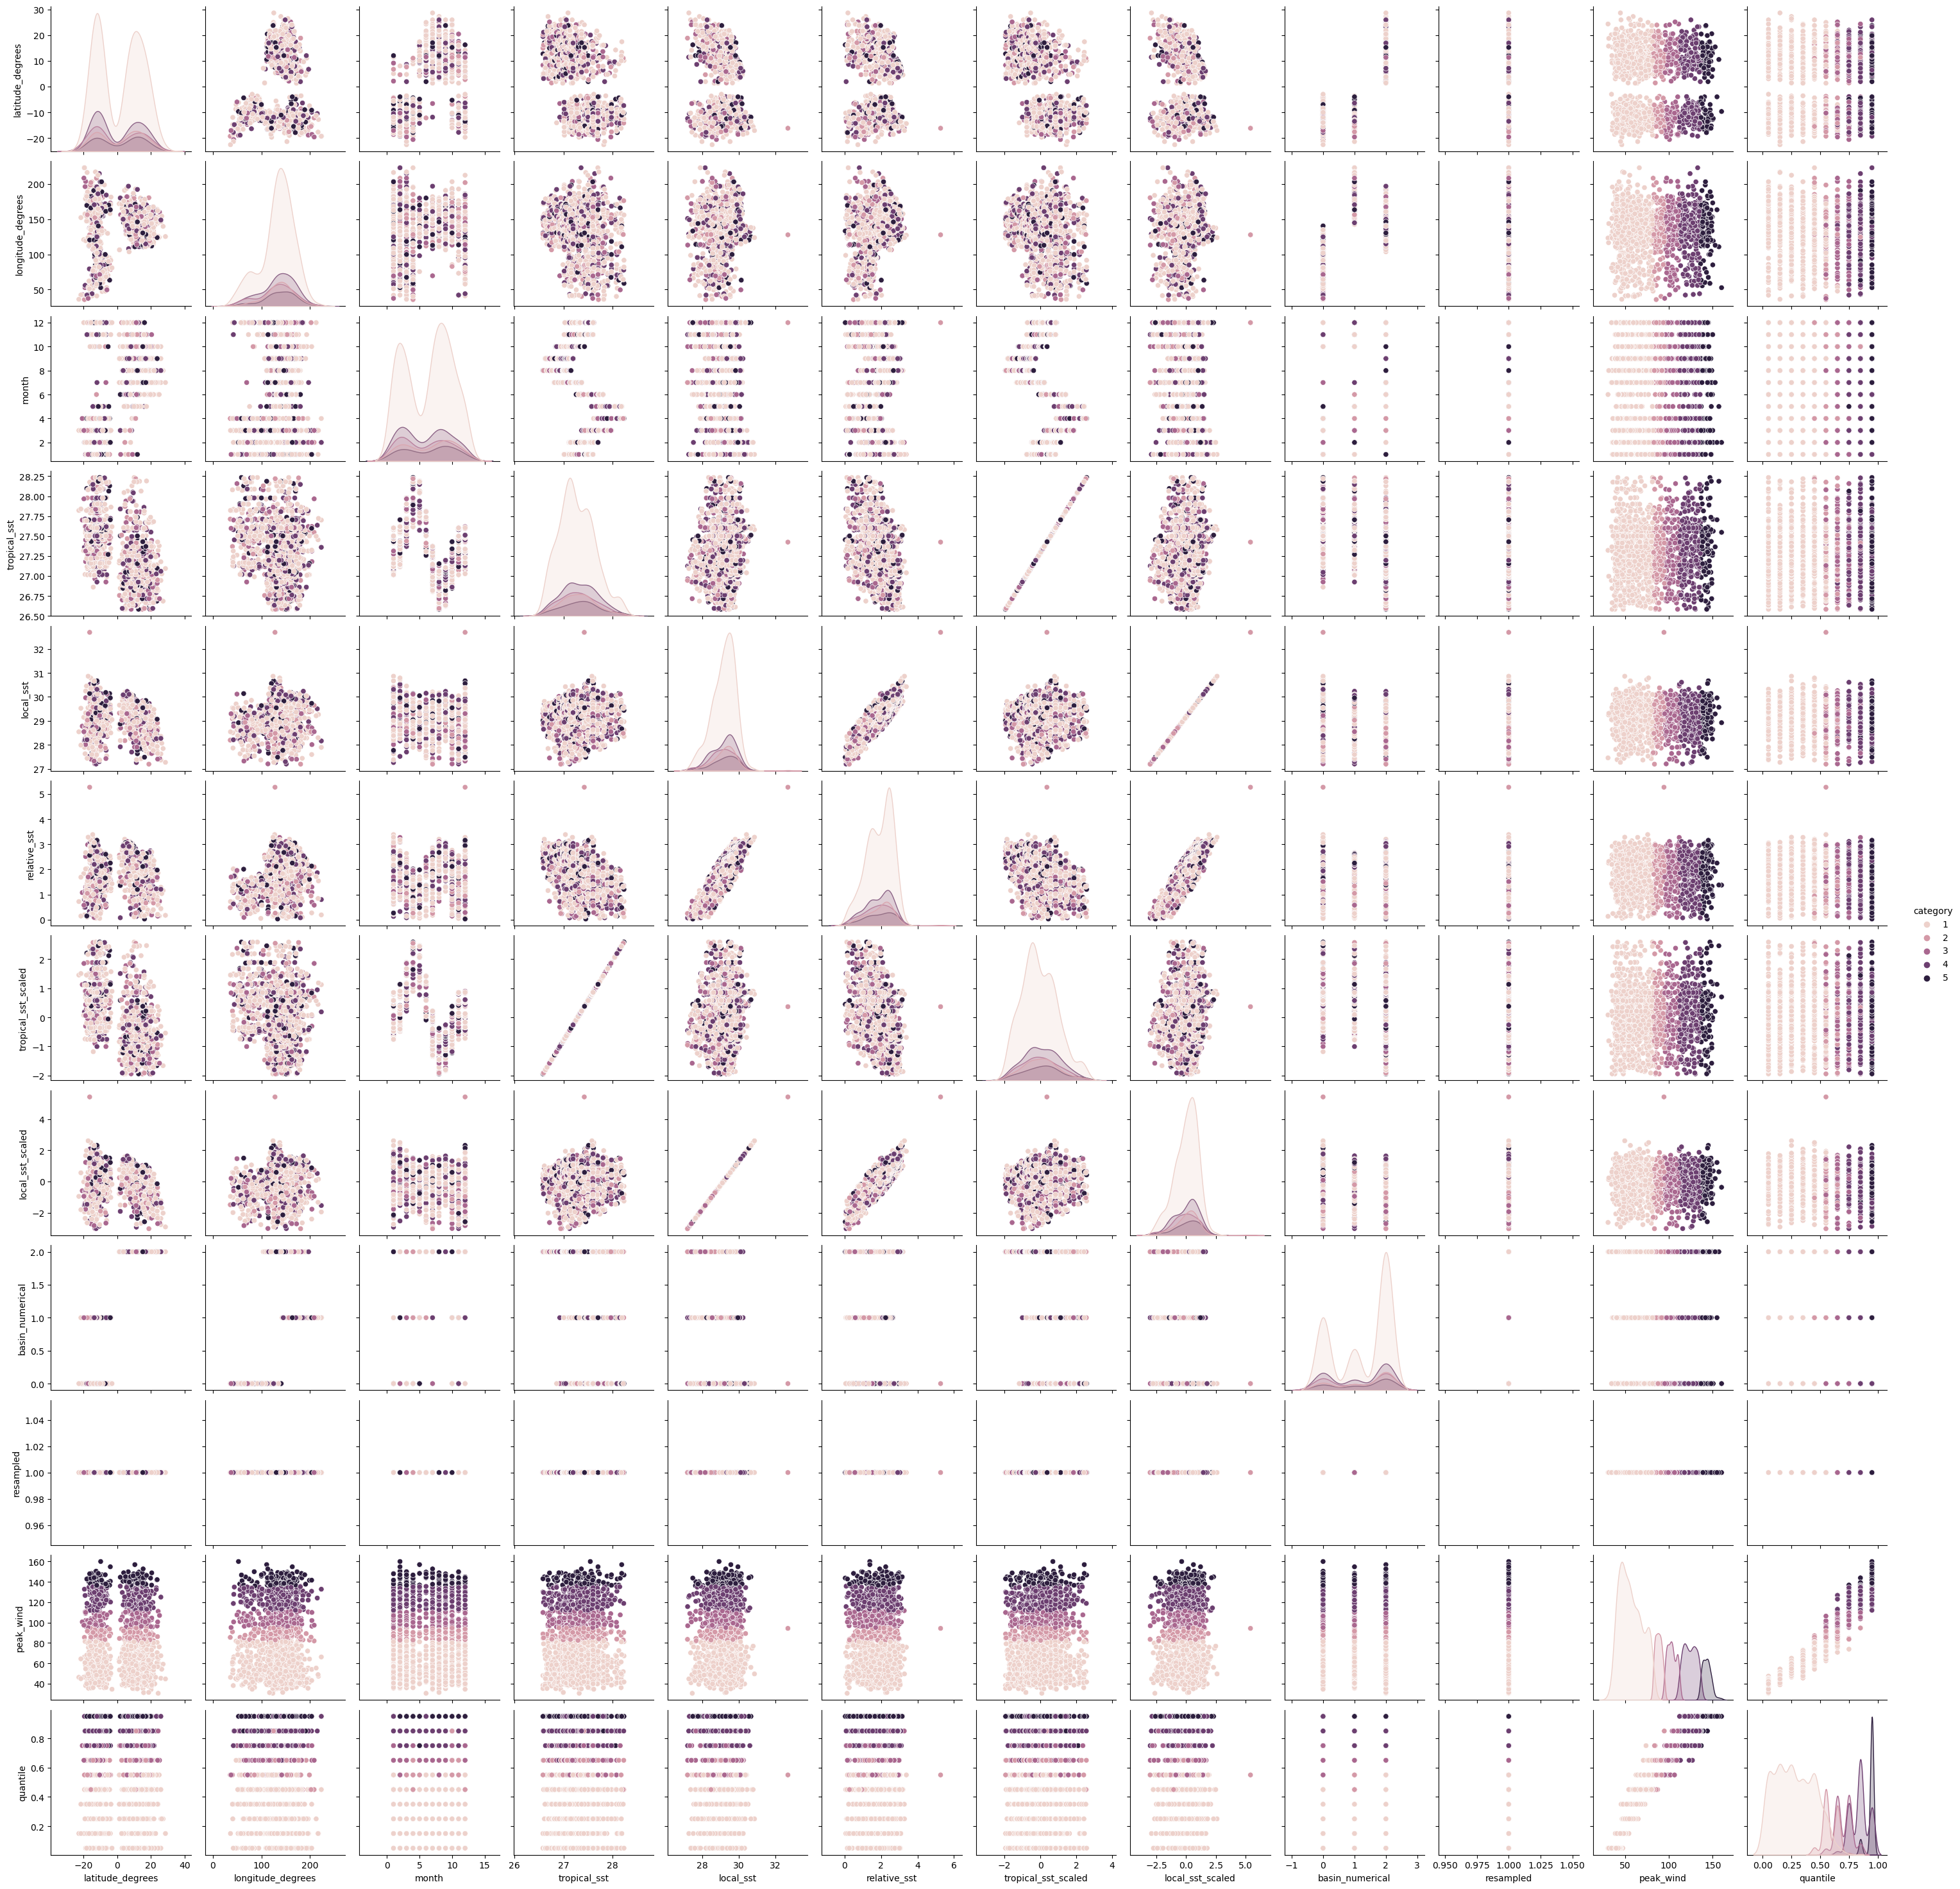

In [14]:
### COMPARE HISTORICAL DATA WITH 'REANALYSED' DATA --- what do we get....
from utils.jtwc_cyclone_utils import get_saffir_simpson_category
 
wind_predictions_df['category'] = wind_predictions_df['peak_wind'].apply(get_saffir_simpson_category)
sns.pairplot(wind_predictions_df, hue='category')
basin_names = wind_predictions_df['basin'].unique()

/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_33510/3417675570.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cyclone_df.columns = cyclone_df.columns.str.replace(' ', '_').str.replace('(','').str.replace(')','').str.lower().str.replace('vmax_kt', 'wind')
/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_33510/3417675570.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cyclone_df.columns = cyclone_df.columns.str.replace(' ', '_').str.replace('(','').str.replace(')','').str.lower().str.replace('vmax_kt', 'wind')


number of real cyclones with local_sst between 26.402126 and 28.41275125: 380
number of simulated cyclones with local_sst between 26.402126 and 28.41275125: 188
number of real cyclones with local_sst between 28.41275125 and 28.876851000000002: 380
number of simulated cyclones with local_sst between 28.41275125 and 28.876851000000002: 241
number of real cyclones with local_sst between 28.876851000000002 and 29.265435500000002: 380
number of simulated cyclones with local_sst between 28.876851000000002 and 29.265435500000002: 283
number of real cyclones with local_sst between 29.265435500000002 and 31.038895: 380
number of simulated cyclones with local_sst between 29.265435500000002 and 31.038895: 716


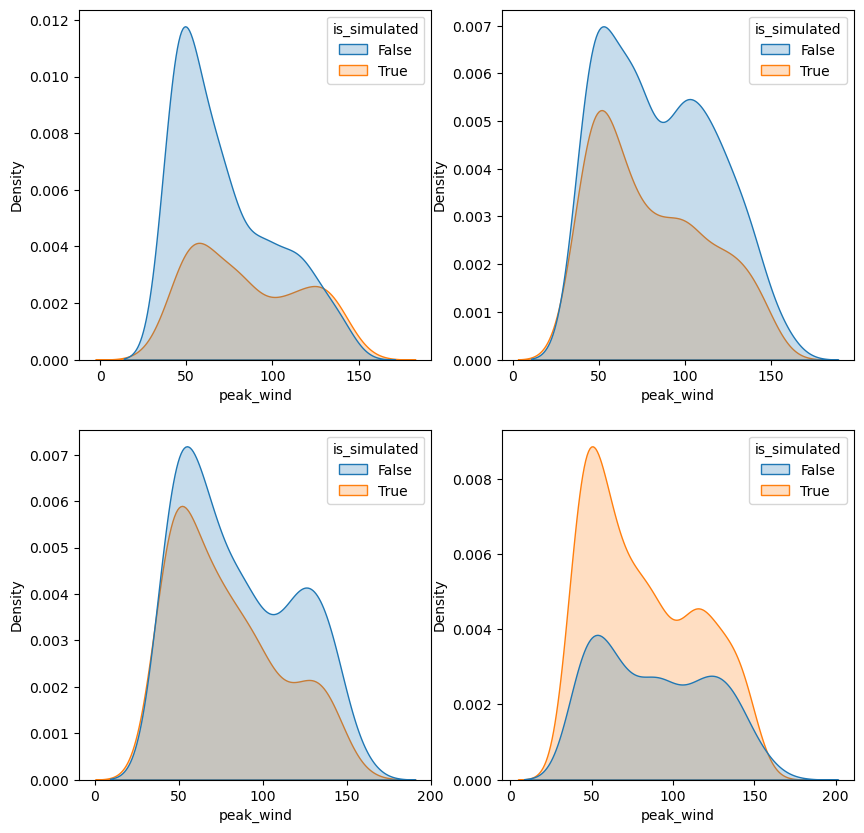

number of real cyclones with tropical_sst between 26.1489 and 26.674932: 385
number of simulated cyclones with tropical_sst between 26.1489 and 26.674932: 41
number of real cyclones with tropical_sst between 26.674932 and 26.890726: 383
number of simulated cyclones with tropical_sst between 26.674932 and 26.890726: 165
number of real cyclones with tropical_sst between 26.890726 and 27.23710425: 380
number of simulated cyclones with tropical_sst between 26.890726 and 27.23710425: 477
number of real cyclones with tropical_sst between 27.23710425 and 28.228575: 380
number of simulated cyclones with tropical_sst between 27.23710425 and 28.228575: 740


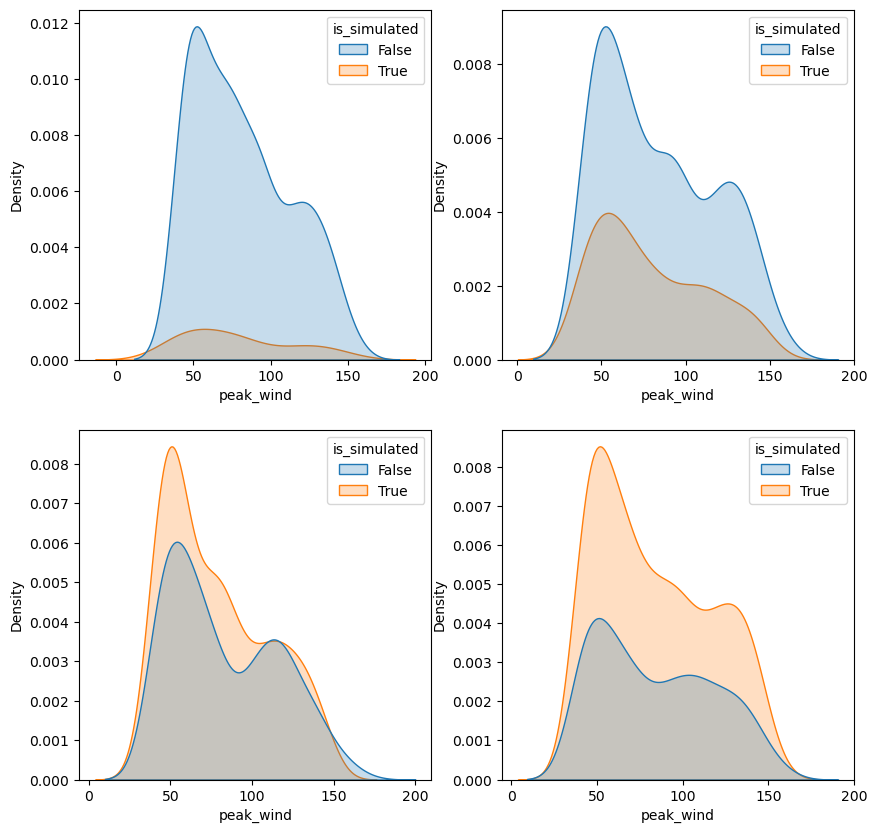

number of real cyclones with relative_sst between 0.029685974 and 1.3568401: 380
number of simulated cyclones with relative_sst between 0.029685974 and 1.3568401: 350
number of real cyclones with relative_sst between 1.3568401 and 1.89828585: 380
number of simulated cyclones with relative_sst between 1.3568401 and 1.89828585: 317
number of real cyclones with relative_sst between 1.89828585 and 2.396903025: 380
number of simulated cyclones with relative_sst between 1.89828585 and 2.396903025: 340
number of real cyclones with relative_sst between 2.396903025 and 4.2338123: 380
number of simulated cyclones with relative_sst between 2.396903025 and 4.2338123: 421


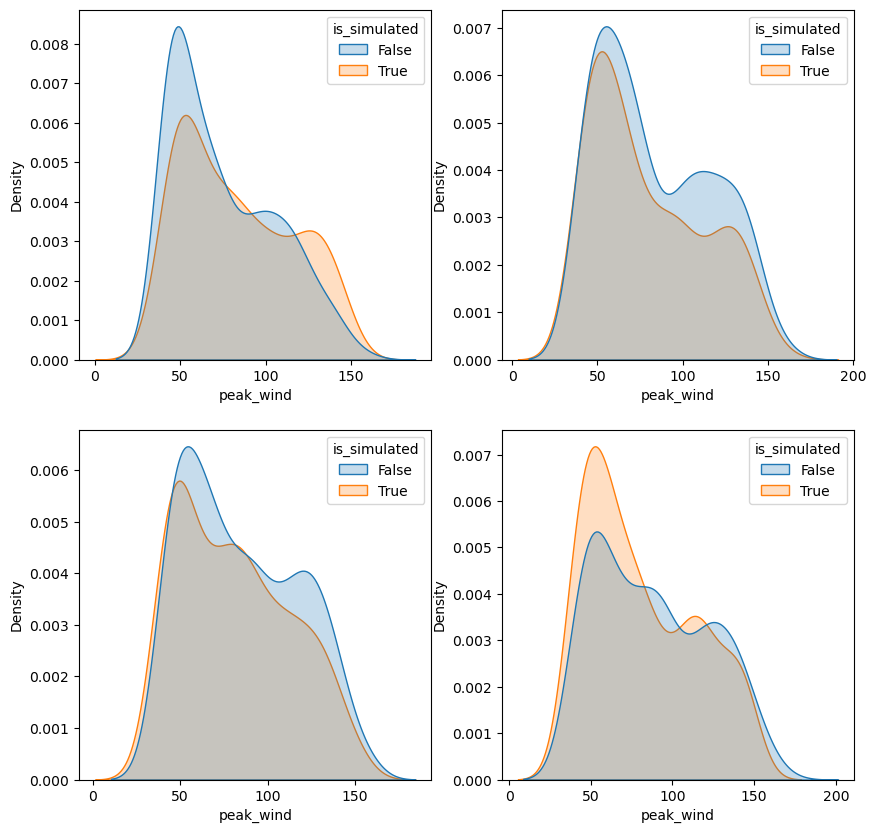

In [15]:
cyclone_df.columns = cyclone_df.columns.str.replace(' ', '_').str.replace('(','').str.replace(')','').str.lower().str.replace('vmax_kt', 'wind')
variables = ['local_sst', 'tropical_sst', 'relative_sst']
cyclone_df = cyclone_df.loc[cyclone_df.loc[:, 'timestamp'] < '2015']
for variable in variables:
    fig, axs = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
    row = 0
    col = 0
    # split into 4 quantiles
    for (lower_p, upper_p) in [(0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1)]: 
        lower_q = cyclone_df[variable].quantile(lower_p)
        upper_q = cyclone_df[variable].quantile(upper_p)

        # sim_lower_q = wind_predictions_df[variable].quantile(lower_p)
        # sim_upper_q = wind_predictions_df[variable].quantile(upper_p)

        real_tcs_slice = cyclone_df.loc[(cyclone_df.loc[:, variable] >= lower_q) & (cyclone_df.loc[:, variable] <= upper_q)].copy().loc[:, ['peak_wind']]
        real_tcs_slice['is_simulated'] = False
        sim_tcs_slice = wind_predictions_df.loc[(wind_predictions_df.loc[:, variable] >= lower_q) & (wind_predictions_df.loc[:, variable] <= upper_q) ].copy().loc[:, ['peak_wind']]
        sim_tcs_slice['is_simulated'] = True

        concat = pd.concat([real_tcs_slice, sim_tcs_slice])

        print(f'number of real cyclones with {variable} between {lower_q} and {upper_q}: {real_tcs_slice.shape[0]}')
        print(f'number of simulated cyclones with {variable} between {lower_q} and {upper_q}: {sim_tcs_slice.shape[0]}')

        sns.kdeplot(data=concat, x='peak_wind', hue='is_simulated', common_norm=True, fill=True,  multiple='layer',ax=axs[row][col])

        col += 1
        if col == 2:
            col = 0;
            row += 1

    plt.show()
    
